In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from pylab import *

## 尤度
「サンプリングしてデータが観測された後、そのデータは元々どういうパラメーターを持つ確率分布から生まれたものだったか？」と言う問いに答えるためのもの

正規分布のプロット

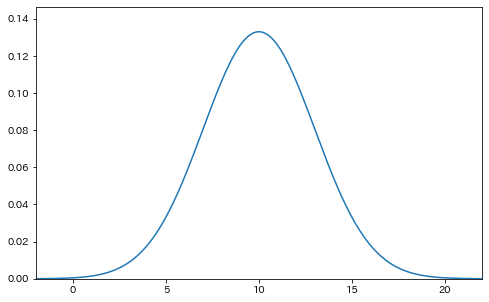

In [5]:
mean = 10
std = 3

min_x = mean-4*std
max_x = mean+4*std

x = np.linspace(min_x, max_x, 201)

# 正規分布に代入
y = (1/np.sqrt(2*np.pi*std**2))*np.exp(-0.5*(x-mean)**2/std**2)

plt.figure(figsize=(8,5))
plt.xlim(min_x, max_x)
plt.ylim(0,max(y)*1.1)
plt.plot(x,y)

plt.show()

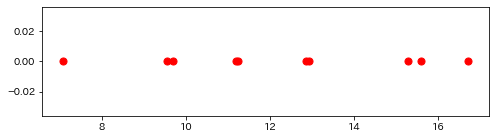

In [4]:
fig = plt.figure(figsize=(8,2))

np.random.seed(0)

data_norm = np.random.normal(10, 3, 10)
plt.scatter(data_norm, np.zeros_like(data_norm), c='r', s=50)

plt.show()

/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


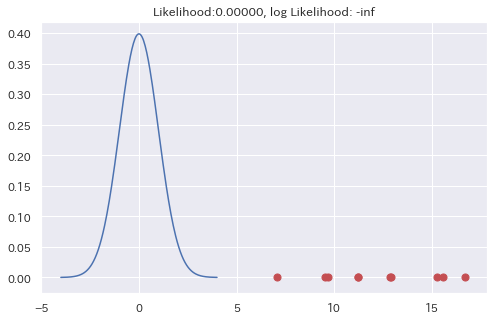

In [15]:
sns.set()

mean = 0
std = 1

min_x = mean-4*std
max_x = mean+4*std

def norm_density(val):
    return (1/np.sqrt(2*np.pi*std**2))*np.exp(-0.5*(val - mean)**2/std**2)

x = np.linspace(min_x, max_x, 201)
y= norm_density(x)

# 尤度
Likelihood = np.prod([norm_density(x_i) for x_i in data_norm])

# 対数尤度
log_Likelihood = np.log(Likelihood)

fig = plt.figure(figsize=(8, 5))

plt.plot(x, y)

plt.scatter(data_norm, np.zeros_like(data_norm), c='r', s=50)

for d in data_norm:
    plt.plot([d, d], [0, norm_density(d)], 'k--', lw=1)
    
plt.title('Likelihood:{0:.5f}, log Likelihood: {1:.5f}'.format(Likelihood, log_Likelihood))

plt.show()

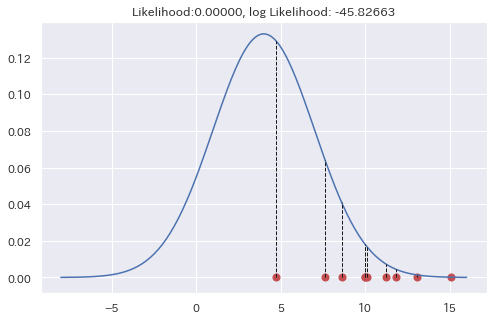

In [23]:
sns.set()

mean = 4
std = 3

min_x = mean-4*std
max_x = mean+4*std

def norm_density(val):
    return (1/np.sqrt(2*np.pi*std**2))*np.exp(-0.5*(val - mean)**2/std**2)

x = np.linspace(min_x, max_x, 201)
y= norm_density(x)

# 尤度
Likelihood = np.prod([norm_density(x_i) for x_i in data_norm])

# 対数尤度
log_Likelihood = np.log(Likelihood)

fig = plt.figure(figsize=(8, 5))

plt.plot(x, y)

plt.scatter(data_norm, np.zeros_like(data_norm), c='r', s=50)

for d in data_norm:
    plt.plot([d, d], [0, norm_density(d)], 'k--', lw=1)
    
plt.title('Likelihood:{0:.5f}, log Likelihood: {1:.5f}'.format(Likelihood, log_Likelihood))

plt.show()

/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0.5, 0, 's')

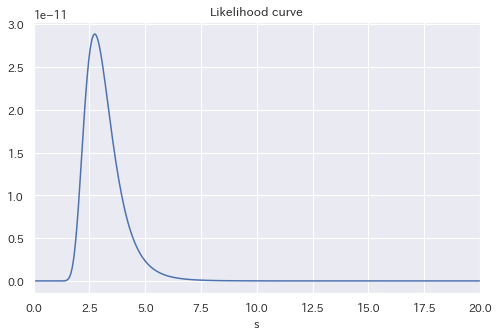

In [25]:
list_L = []
m = 10

ss = np.linspace(0, 20,300)
for s in ss:
    list_L.append(np.prod([norm_dens(x_i, m, s) for x_i in data_norm]))

plt.figure(figsize=(8,5))
plt.xlim(min(ss), max(ss))
plt.plot(ss, (list_L))
plt.title("Likelihood curve")
plt.xlabel("s")

/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0, 0.5, 's')

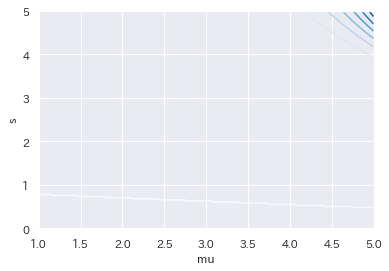

In [31]:
def norm_dens(val, m, s):
    return (1/np.sqrt(2*np.pi*s**2))*np.exp(-0.5*(val-m)**2/s**2)

fig = plt.figure()
mu = np.linspace(5 , 1, 200)
s = np.linspace(0, 5, 200)
MU, S = np.meshgrid(mu, s)

Z =np.array([(np.prod([norm_dens(x_i, a, b) for x_i in data_norm])) for a, b in zip(MU.flatten(), S.flatten())])
plt.contour(MU, S, Z.reshape(MU.shape), cmap=cm.Blues)


plt.xlabel('mu')
plt.ylabel('s')

## 多項式フィッティング

[-0.00329154]
[ 1.08605749 -2.42077562]
[  0.25584405  10.99380099 -37.04452044  26.42638167]
[ 4.95209855e-01  6.04333541e+01 -1.28911030e+03  9.83597749e+03
 -3.28188438e+04  4.21293870e+04  2.22681441e+04 -1.22102937e+05
  1.24140039e+05 -4.23244243e+04]


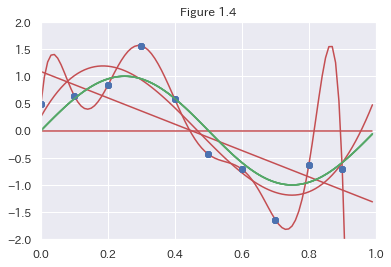

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#(1.1) 予測値yの計算。多項式フィッティングなので、基底関数は多項式
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

if __name__ == "__main__":
    #Sine curve
    x_real = np.arange(0, 1, 0.01)
    y_real = np.sin(2*np.pi*x_real)

    ##Training Data
    N=10
    x_train = np.arange(0, 1, 0.1)

    #Set "small level of random noise having a Gaussian distribution"
    # ガウス分布に従うノイズを含んだ学習データを作成
    loc = 0
    scale = 0.3
    y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

    # 次数ごとにフィッティング
    for M in [0,1,3,9]:
        W = E(x_train, y_train, M)
        print(W)

        y_estimate = [y(x, W, M) for x in x_real]


        plt.plot(x_real, y_estimate, 'r-')
        plt.plot(x_train, y_train, 'bo') 
        plt.plot(x_real, y_real, 'g-')
        xlim(0.0, 1.0)
        ylim(-2, 2)
        title("Figure 1.4")


サンプル数の違い

Text(0.5, 1.0, 'Figure 1.6 right')

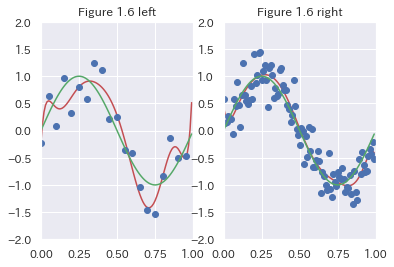

In [36]:
M2 = 9

N2 = 20
x_train2 = np.arange(0, 1, 0.05)
y_train2 =  np.sin(2*np.pi*x_train2) + np.random.normal(loc,scale,N2)

N3 = 100
x_train3 = np.arange(0,1, 0.01)
y_train3 =  np.sin(2*np.pi*x_train3) + np.random.normal(loc,scale,N3)


W2 = E(x_train2, y_train2, M2)
W3 = E(x_train3, y_train3, M2)

y_estimate2 = [y(x, W2, M2) for x in x_real]
y_estimate3 = [y(x, W3, M2) for x in x_real]

plt.subplot(1, 2, 1)
plt.plot(x_real, y_estimate2, 'r-')
plt.plot(x_train2, y_train2, 'bo') 
plt.plot(x_real, y_real, 'g-')
xlim(0.0, 1.0)
ylim(-2, 2)
title("Figure 1.6 left")

plt.subplot(1, 2, 2)
plt.plot(x_real, y_estimate3, 'r-')
plt.plot(x_train3, y_train3, 'bo') 
plt.plot(x_real, y_real, 'g-')
xlim(0.0, 1.0)
ylim(-2, 2)
title("Figure 1.6 right")

## ベイズ曲線フィッティング

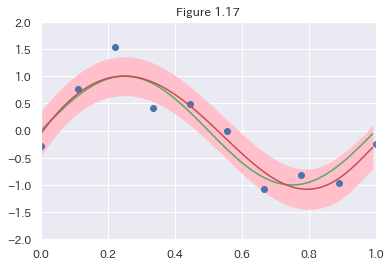

In [38]:
#From p31 the auther define phi as following
def phi(x):
    return np.array([x**i for i in range(M+1)]).reshape((M+1, 1))

#(1.70) Mean of predictive distribution
def m(x, x_train, y_train, S):
    sum = np.array(zeros((M+1, 1)))
    for n in range(len(x_train)):
        sum += np.dot(phi(x_train[n]), y_train[n])
    return Beta * phi(x).T.dot(S).dot(sum)


#(1.71) Variance of predictive distribution   
def s2(x, S):
    return 1.0/Beta + phi(x).T.dot(S).dot(phi(x))

#(1.72)
def S(x_train, y_train):
    I = np.identity(M+1)
    Sigma = np.zeros((M+1, M+1))
    for n in range(len(x_train)):
        Sigma += np.dot(phi(x_train[n]), phi(x_train[n]).T)
    S_inv = alpha*I + Beta*Sigma
    S = np.linalg.inv(S_inv)
    return S

if __name__ == "__main__":
    alpha = 0.005
    Beta = 11.1
    M = 9

    #Sine curve
    x_real = np.arange(0, 1, 0.01)
    y_real = np.sin(2*np.pi*x_real)

    ##Training Data
    N=10
    x_train = np.linspace(0, 1, 10)

    #Set "small level of random noise having a Gaussian distribution"
    loc = 0
    scale = 0.3
    y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)


    S = S(x_train, y_train)

    #Seek predictive distribution corespponding to entire x
    mean = [m(x, x_train, y_train, S)[0,0] for x in x_real]
    variance = [s2(x, S)[0,0] for x in x_real]
    SD = np.sqrt(variance)
    upper = mean + SD
    lower = mean - SD


    plot(x_train, y_train, 'bo')
    plot(x_real, y_real, 'g-')
    plot(x_real, mean, 'r-')
    fill_between(x_real, upper, lower, color='pink')
    xlim(0.0, 1.0)
    ylim(-2, 2)
    title("Figure 1.17")